### Assignment 3

Due: **10:00 10. Juni 2025**

Discussion: **12:00 10. Mai 2025**

**Online submission** at via github classroom  

In [1]:
%matplotlib inline

das blatt wurde gänzlich mit copilot gelöst. Die einzige eingabe war, dass die aufgaben des jupyter notebooks der reihe nach gelöst werden sollen.

# 1. Supernova rate per century - SN1987A

In the lecture we discussed the example of how to estimate the expected rate of supernovae per century, based on past occurances of
supernovae. Using a Bayesian approach we found that the posterior probabilty distribution of supernovae per cuntury (visible by naked eye)
can be described for n supernovae in m centuries as

$$\mathcal{P}(\rho\mathrm{|data}) = \frac{\rho^n(1-\rho)^{m-n}}{B(n+1, m-n+1)}$$

Here the denominator is used to normalize the distribution:

$$\int_0^1\mathcal{P}(\rho\mathrm{|data}) d\rho = \int_0^1 \binom{m}{n} \rho^n (1-\rho)^{m-n} d\rho =$$

$$ \binom{m}{n} \frac{\Gamma(m-n+1)\Gamma(n+1)}{\Gamma(m+2)} = \binom{m}{n} B(n+1, m-n+1)$$

**a.** Write a computer program, to compute $\mathcal{P}(ρ |\mathrm{data})$ for any n supernovae in `m` centuries. **10 Points**

In [3]:
# Zelle unter "a." (nach VSCode.Cell id="9de5c148")
import numpy as np
from scipy.special import beta

def P_rho_given_data(rho, n, m):
    """Berechnet die Posterior-Verteilung P(rho|data) für n Supernovae in m Jahrhunderten."""
    return (rho**n) * ((1 - rho)**(m - n)) / beta(n + 1, m - n + 1)

# Beispiel: Wertebereich für rho
rho_values = np.linspace(0, 1, 200)
# Beispiel für n=4, m=10
P_values = P_rho_given_data(rho_values, 4, 10)
P_values[:5]  # Ausgabe der ersten Werte als Beispiel

array([0.00000000e+00, 1.42913204e-06, 2.21818904e-05, 1.08918754e-04,
       3.33832680e-04])

**b.** Plot the distribution $\mathcal{P}(ρ |\mathrm{data})$ for 4 supernovae in 10 centuries and for 5 supernovae in 10 centuries in the same Figure. **5 Points**

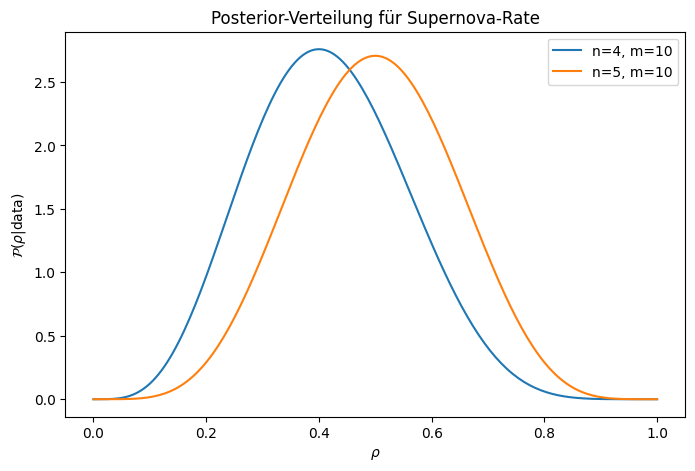

In [4]:
# Zelle unter "b." (nach VSCode.Cell id="14de7dbc")
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(rho_values, P_rho_given_data(rho_values, 4, 10), label="n=4, m=10")
plt.plot(rho_values, P_rho_given_data(rho_values, 5, 10), label="n=5, m=10")
plt.xlabel(r"$\rho$")
plt.ylabel(r"$\mathcal{P}(\rho|\mathrm{data})$")
plt.title("Posterior-Verteilung für Supernova-Rate")
plt.legend()
plt.show()

**c.** Assume, that the true distribution $\mathcal{P}(ρ |\mathrm{data})$ would be $\mathcal{P}(ρ |\mathrm{data})= \frac{\rho^8(1-\rho)^{10-8}}{B(8+1, 10-8+1)}$ i.e. 8 supernovae in 10 centuries.

 > **i.** Plot the distribution now. **5 Points**

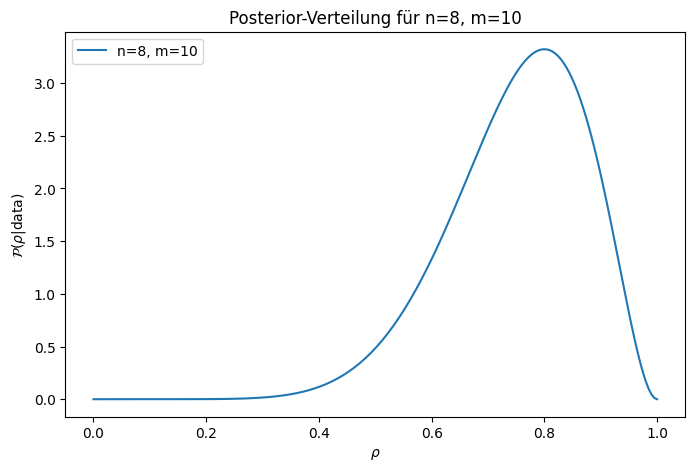

In [5]:
# Zelle unter "i." (nach VSCode.Cell id="02a9e59c")
plt.figure(figsize=(8,5))
plt.plot(rho_values, P_rho_given_data(rho_values, 8, 10), label="n=8, m=10")
plt.xlabel(r"$\rho$")
plt.ylabel(r"$\mathcal{P}(\rho|\mathrm{data})$")
plt.title("Posterior-Verteilung für n=8, m=10")
plt.legend()
plt.show()

 > **ii.** Compute the probability, given this distribution, to observe 5 supernovae or less in 10 centuries. **10 Points**

In [6]:
# Zelle unter "ii." (nach VSCode.Cell id="8b581907")
from scipy.stats import binom

# Maximum der Posterior-Verteilung (MAP-Schätzer)
rho_mode = 8 / 10

# Wahrscheinlichkeit, 5 oder weniger Supernovae zu beobachten
prob_5_or_less = binom.cdf(5, 10, rho_mode)
print(f"Wahrscheinlichkeit, 5 oder weniger Supernovae zu beobachten: {prob_5_or_less:.4f}")

Wahrscheinlichkeit, 5 oder weniger Supernovae zu beobachten: 0.0328


# 2. Samples & Sampling Simulation

Write a numerical simulation code that reproduces the behaviour of the following simulation. (Also shown in the lecture.)

Draw N samples of size n from a population with $\mu=5$ and $\sigma=1$. Compute the confidence intervals (CI) of each sample distribution and the sampling distribution and visualize it in a similar manner. Test your simulation against your theoretical expectations. Make sure to test your result and to confirm that the result is as expected. (i.e. About 5 % of the samples not overlapping with the confidence interval, or 5% of all simulations with the population mean not part of the confidence interval.) **30 Points**

\newpage

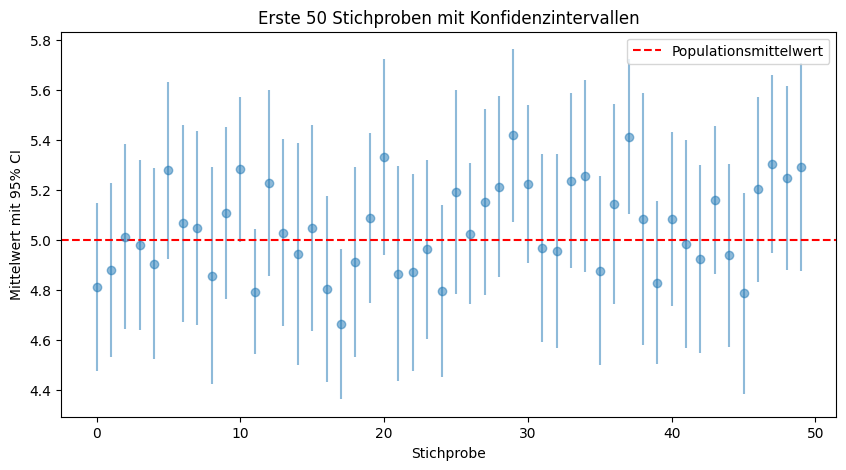

Anteil der Stichproben, deren CI den Populationsmittelwert nicht enthält: 0.052


In [7]:
# Zelle unter Aufgabe 2 (nach VSCode.Cell id="e675c535")
import scipy.stats as stats

np.random.seed(42)
mu, sigma = 5, 1
N = 1000  # Anzahl der Stichproben
n = 30    # Stichprobengröße

means = []
cis = []
count_outside = 0

for _ in range(N):
    sample = np.random.normal(mu, sigma, n)
    mean = np.mean(sample)
    std = np.std(sample, ddof=1)
    ci = stats.t.interval(0.95, n-1, loc=mean, scale=std/np.sqrt(n))
    means.append(mean)
    cis.append(ci)
    if not (ci[0] <= mu <= ci[1]):
        count_outside += 1

means = np.array(means)
cis = np.array(cis)

plt.figure(figsize=(10,5))
plt.errorbar(range(50), means[:50], yerr=[means[:50]-cis[:50,0], cis[:50,1]-means[:50]], fmt='o', alpha=0.5)
plt.axhline(mu, color='red', linestyle='--', label='Populationsmittelwert')
plt.xlabel('Stichprobe')
plt.ylabel('Mittelwert mit 95% CI')
plt.title('Erste 50 Stichproben mit Konfidenzintervallen')
plt.legend()
plt.show()

print(f"Anteil der Stichproben, deren CI den Populationsmittelwert nicht enthält: {count_outside/N:.3f}")

# 3. Parametric tests: mean
A very common question arises when we have two sets of data (or one set of data and a model) and we ask if they differ in location. To contrast the classical and Bayesian methods for hypothesis testing, we look at the simple case of comparison of means. We deal with a Gaussian distribution, because its analytical tractability has resulted in many tests being developed for Gaussian data; and then, of course, there is the central limit theorem.

Let us suppose we have $n$ data $X_i$ drawn from a Gaussian of mean $\mu_x$, and $m$ other data $Y_i$, drawn from a Gaussian of **identical variance** but different mean $\mu_y$. Call the common variance $\sigma^2$. The Bayesian method is to calculate the joint posterior distribution:

$$ \mathcal{P}(\mu_x,\mu_y,\sigma)\propto\dfrac{1}{\sigma^{n+m+1}}\exp\left(-\dfrac{\Sigma_i (x_i-\mu_x)^2}{2\sigma^2}\right)\exp\left(-\dfrac{\Sigma_i (y_i-\mu_y)^2}{2\sigma^2}\right) $$

in which we have used the Jeffreys prior for the variance. Integrating over the 'nuisance' parameter $\sigma$, we would get the joint probability prob($\mu_x,\mu_y$) and could use it to derive, for example, the probability that $\mu_x$ is bigger than $\mu_y$. From this we can calculate the probability distribution of ($\mu_x-\mu_y$). The result depends on the data via a quantity

$$ t^\prime = \dfrac{(\mu_x-\mu_y)-(\bar{X}-\bar{Y})}{s\sqrt{\frac{1}{m}+\frac{1}{n}}}, \qquad \textrm{where} \qquad s^2 = \dfrac{nS_x+mS_y}{\nu} $$

with the usual mean squares $S_x = \Sigma (X_i-\bar{X})^2 / n$, similarly for $S_y$, and $\nu=n+m-2$. $s$ is called pooled standard deviation. The probability for $t^\prime$ is

$$ \mathcal{P}(t^\prime) = \dfrac{\Gamma\left(\frac{\nu+1}{2}\right)}{\sqrt{\pi\nu}\Gamma\left(\frac{\nu}{2}\right)} \left(1+\dfrac{t^{\prime 2}}{\nu}\right)^{-\frac{1}{2}(\nu+1)} $$

We regard the data as fixed and $(\mu_x-\mu_y)$ as the variable, simply computing the probability of any particular difference in the means. We might alternatively work out the range of differences whichare, say, 90 percent probable, or we might carry the distribution of $(\mu_x-\mu_y)$ on into a later probabilistic calculation. If we instead follow the classical line of reasoning, we do not treat the $\mu$'s as random variables. Instead we guess that the difference in the averages $X-Y$ will be the statistic we need; and we calculate its distribution on the null hypothesis that $\mu_x=\mu_y$. We find that

$$ t=\dfrac{\bar{X}-\bar{Y}}{s\sqrt{\frac{1}{m}+\frac{1}{n}}} $$

follows a t-distribution with $(n+m-2)$ degrees of freedom. This is the classical Student's t. This gives the basis of a classical hypothesis test, the t-test for means. Assuming that $(\mu_x-\mu_y)=0$ (the null hypothesis), we calculate t. If it (or some greater value) is very unlikely, we think that the null hypothesis is ruled out.

**a.** Suppose we have two small sets of data, from Gaussian distributions of equal variance: $(-1.22, -1.17, 0.93, -0.58, -1.14) \in A$ and $(1.03, -1.59, -0.41, 0.71, 2.10) \in B$. Compute the respective mean values and the pooled standard deviation $s$ **5 Points**

In [8]:
# Zelle unter Aufgabe 3a (nach VSCode.Cell id="cbed8169")
A = np.array([-1.22, -1.17, 0.93, -0.58, -1.14])
B = np.array([1.03, -1.59, -0.41, 0.71, 2.10])

mean_A = np.mean(A)
mean_B = np.mean(B)
n, m = len(A), len(B)

S_A = np.sum((A - mean_A)**2) / n
S_B = np.sum((B - mean_B)**2) / m
nu = n + m - 2
s_pooled = np.sqrt((n*S_A + m*S_B) / nu)

print(f"Mittelwert A: {mean_A:.2f}, Mittelwert B: {mean_B:.2f}")
print(f"Pooled Standardabweichung s: {s_pooled:.2f}")

Mittelwert A: -0.64, Mittelwert B: 0.37
Pooled Standardabweichung s: 1.19


**b.** Compute the t statistic. Perform a two tailed test. What is the chance that these data would arise if the means were the same. What is the chance if we did a one-tailed test? **10 Points**

In [9]:
# Zelle unter Aufgabe 3b (nach VSCode.Cell id="3e5c5a16")
t = (mean_A - mean_B) / (s_pooled * np.sqrt(1/n + 1/m))
p_two_tailed = 2 * stats.t.sf(np.abs(t), df=nu)
p_one_tailed = stats.t.sf(np.abs(t), df=nu)

print(f"t-Statistik: {t:.2f}")
print(f"Zweist. p-Wert: {p_two_tailed:.3f}")
print(f"Einseit. p-Wert: {p_one_tailed:.3f}")

t-Statistik: -1.33
Zweist. p-Wert: 0.219
Einseit. p-Wert: 0.109


**c.** Calculate the distribution of $(\mu_x-\mu_y)$ from a Bayesian point of view and plot the resulting prob($\mu_x-\mu_y$) as a function of $(\mu_x-\mu_y)$. What is the chance that $\mu_x$ is not smaller than $\mu_y$? **10 Points**

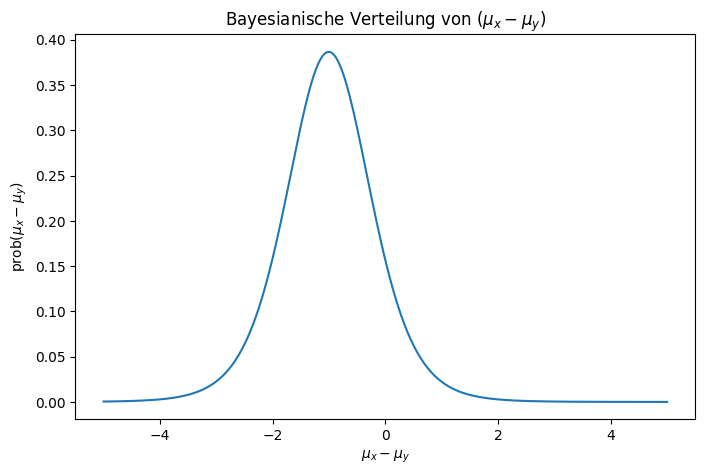

Wahrscheinlichkeit, dass mu_x >= mu_y: 0.107


In [10]:
# Zelle unter Aufgabe 3c (nach VSCode.Cell id="3d0b7c01")
delta = np.linspace(-5, 5, 500)
s2 = s_pooled
t_prime = (delta - (mean_A - mean_B)) / (s2 * np.sqrt(1/n + 1/m))
P_tprime = stats.t.pdf(t_prime, df=nu)

plt.figure(figsize=(8,5))
plt.plot(delta, P_tprime)
plt.xlabel(r"$\mu_x - \mu_y$")
plt.ylabel(r"prob($\mu_x-\mu_y$)")
plt.title("Bayesianische Verteilung von $(\mu_x-\mu_y)$")
plt.show()

# Wahrscheinlichkeit, dass mu_x >= mu_y
prob_mu_x_ge_mu_y = np.trapz(P_tprime[delta >= 0], delta[delta >= 0]) / np.trapz(P_tprime, delta)
print(f"Wahrscheinlichkeit, dass mu_x >= mu_y: {prob_mu_x_ge_mu_y:.3f}")

**d.** By analogous calculations we arrive at the F test for variances. Again Gaussian distributions are assumed. The null hypothesis is $\sigma_x=\sigma_y$, the data are $X_i (i=1,\ldots,n)$ and $Y_i (i=1,\ldots,m)$ and the test statistic is,

$${\cal F} = \dfrac{\Sigma_i\left(X_i-\bar{X}\right)^2/(n-1)}{\Sigma_i\left(Y_i-\bar{Y}\right)^2/(m-1)}$$

This follows the F ratio distribution with $(n-1)$ and $(m-1)$ degrees of freedom. The testing is the as for the Student's t. Perform a test whether the variances of the two data sets are the same. **15 Points**

In [11]:
# Zelle unter Aufgabe 3d (nach VSCode.Cell id="c20e8846")
F = np.var(A, ddof=1) / np.var(B, ddof=1)
dfn, dfd = n-1, m-1
p_F = 2 * min(stats.f.cdf(F, dfn, dfd), 1 - stats.f.cdf(F, dfn, dfd))

print(f"F-Statistik: {F:.2f}")
print(f"p-Wert für F-Test: {p_F:.3f}")

F-Statistik: 0.42
p-Wert für F-Test: 0.418
